# Imports and dataset loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow as tf
import pandas as pd

import os
path = os.getcwd()
currentAmpNumber = int(os.path.basename(path)[0])
maxAmpNumber     = 7

strategyArray = []
gainArray     = []
lossArray     = []
ampNumber     = [maxAmpNumber, currentAmpNumber]

originalDataset = []
binaryDataset   = []

gainScalerList = []
lossScalerList = []

originalDataset.append(pd.read_csv('../dataset.txt', sep = ',',header = None))
originalDataset.append(pd.read_csv('dataset-{}.txt'.format(ampNumber[-1]), sep = ',', header = None))
        
for i in range(2):
    binaryDataset.append([])
    
    for line in originalDataset[i].values:
        myList = [1 if j != 0 else 0 for j in line[:40]]
        myList.extend(line[40:])
        binaryDataset[i].append(myList)
    
    binaryDataset[i] = pd.DataFrame(binaryDataset[i])

def loadDataset(datasetIndex): 
    dataset = binaryDataset[datasetIndex].values[:, :40]
    
    for i in range(0, ampNumber[datasetIndex] * 2, 2):
        gain    = np.array(binaryDataset[datasetIndex].values[:, 40 + i])
        #gain    = gainScaler.transform(gain.reshape(-1, 1))
        gain    = gain.reshape(-1, 1)
        dataset = np.hstack((dataset, gain))
        
        loss    = np.array(binaryDataset[datasetIndex].values[:, 40 + i + 1])
        #loss    = lossScaler.transform(loss.reshape(-1, 1))
        loss    = loss.reshape(-1, 1)
        dataset = np.hstack((dataset, loss))
                
    X, y = np.array(dataset[:, :40]), np.array(dataset[:, 40:])
    return X, y

/home/leandro/Documentos/Mestrado/ACOPResults/acopEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Model setup

In [2]:
summaryList = []

#1 regressor per link
X, y = loadDataset(0)

reg  = LazyRegressor(verbose = 0, ignore_warnings = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
models, summary                  = reg.fit(X_train, X_test, y_train, y_test)

summaryList.append(summary)

print("\n\n##########\n\n")

#1 regressor per amplifier
X, y = loadDataset(1)

for j in range(0, ampNumber[-1] * 2):
    reg = LazyRegressor(verbose = 0, ignore_warnings = False)

    X_train, X_test, y_train, y_test = train_test_split(X, y[:, j], test_size = 0.3, random_state = 0)
    models, summary                  = reg.fit(X_train, X_test, y_train, y_test)
    
    summaryList.append(summary)

 14%|█▍        | 6/43 [00:00<00:00, 40.77it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 21%|██        | 9/43 [00:00<00:01, 22.87it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.


 37%|███▋      | 16/43 [00:00<00:01, 18.56it/s]

GeneralizedLinearRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.


 51%|█████     | 22/43 [00:01<00:01, 17.29it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.


 70%|██████▉   | 30/43 [00:03<00:01,  6.98it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.


100%|██████████| 43/43 [00:04<00:00,  8.75it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.
XGBRegressor model failed to execute
only size-1 arrays can be converted to Python scalars
LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (1144, 14) instead.


##########





 77%|███████▋  | 33/43 [00:03<00:01,  8.91it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


  0%|          | 0/43 [00:00<?, ?it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 18.06it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


  0%|          | 0/43 [00:00<?, ?it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 77%|███████▋  | 33/43 [00:03<00:01,  8.13it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


  0%|          | 0/43 [00:00<?, ?it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 17.10it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 79%|███████▉  | 34/43 [00:03<00:01,  8.72it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:03<00:00, 12.83it/s]


In [3]:
print(len(summaryList[0]['RMSE'])) #one regressor for link
print("\n\n")

print(len(summaryList[1]['RMSE'])) #1st amp gain
print("\n\n")

print(len(summaryList[2]['RMSE'])) #1st amp loss

20



41



41


In [4]:
def prepTable():
    rows    = ["One regressor / link"]
    columns = ("Best strategy", "Best RMSE")
    counter = 1
    
    for i in range(ampNumber[-1] * 2):
        aux = "Gain" if i % 2 == 0 else "Loss"
        rows.append("Amp {} {} RMSE".format(counter, aux))
                    
        if aux == "Loss":
            counter += 1

    gains  = []
    losses = []
    
    for index, summary in enumerate(summaryList):
        if index == 0: 
            continue
            
        if index % 2 != 0:
            gains.append([summary['RMSE'].index[0], round(summary['RMSE'][0], 3)])
        else:
            losses.append([summary['RMSE'].index[0], round(summary['RMSE'][0], 3)])

    mean = [summaryList[0]['RMSE'].index[0], round(summaryList[0]['RMSE'][0], 3)]
    
    return rows, columns, mean, gains, losses

['One regressor / link', 'Amp 1 Gain RMSE', 'Amp 1 Loss RMSE', 'Amp 2 Gain RMSE', 'Amp 2 Loss RMSE']


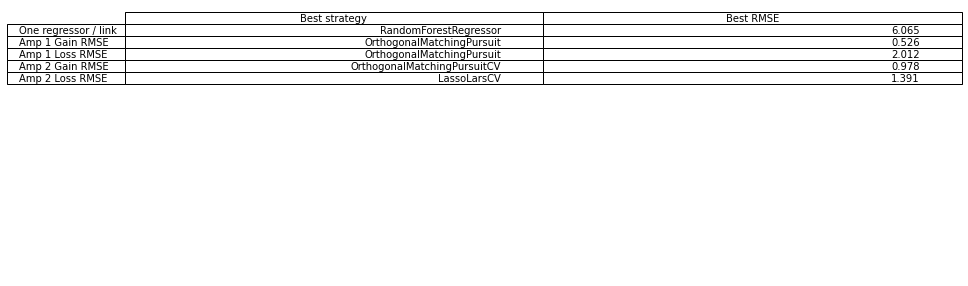

In [5]:
rows, columns, mean, gains, losses = prepTable()

data       = gains + losses
data[::2]  = gains
data[1::2] = losses

fig = plt.figure(figsize = (15, 5))
ax  = fig.add_subplot()
ax.axis("off")

print(rows)
ax.table(cellText  = [mean] + data,
         rowLabels = rows,
         colLabels = columns, loc="upper center")


In [6]:
gains  = np.array(gains)
losses = np.array(losses)

yerr   = gains[:, 1].astype(np.float)
output = ",".join(map(str, yerr)) + "\n"

f = open("../../gain-output.txt", "a")
f.write(output)
f.close()

yerr   = losses[:, 1].astype(np.float)
output = ",".join(map(str, yerr)) + "\n"

f = open("../../loss-output.txt", "a")
f.write(output)
f.close()